## Webscraping and Data Wrangling

The purpose of this is to scrape the web for data or requesting it from an API and then do some data wrangling on them in order to explore the dataset. Then produce a plot to understand and see if there is any relationship between the variables.

Summary:
- webscraping the first page of a website
- wrangling the data
- automating the relational data model
- plotting the relational data model
- StatNZ API
- StatNZ API plot

### Webscraping the first page of a website

Loading necessary libraries

In [1]:
library(tidyverse)
library(magrittr) # better handling of pipes
library(purrr) # to work with lists and map functions
library(glue) # to paste strings
library(stringr) # to hand strings
library(rvest) # rvest makes scraping easier
library(polite) # polite is the "polite" version of rvest
library(xml2) # makes it easier to work with HTML and XML from R

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




The website I find interesting is the IMDB website and its Sci-Fi movies sorted by their US Box Office (Descending).

In [2]:
link = "https://www.imdb.com/search/title/?genres=sci-fi&sort=boxoffice_gross_us,desc&explore=title_type,genres"
weblink = read_html(link)

Getting the link and passing it into read_html() so R can read/parse this html link.

### Wrangling the data

Exploring the data and then transforming it into a relational data model (that is, one or more data frames). It is done this way so we can produce plots about the relational data model later. 

In [3]:
weblink
weblink %>% typeof()
weblink %>% glimpse()

{html_document}
<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body id="styleguide-v2" class="fixed">\n            <img height="1" widt ...

[1] "list"

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"


Weblink is a an html document which is a type of xml document hence the xml2 is useful for parsing this.
R sees weblink as a list, with nodes. 
Nodes will be used later to get specific values. More on this on the next cell.

weblink %>% html_structure(). This code returns a long output of a tree with many nodes, so I opted to not run it as it is not very important. However, I included it for information purposes. 

Using inspect, the css/class for movie names is ".lister-item-header a" which is passed into html_nodes(). 
Then, html_nodes reads all the value that is in that class. All those values are passed into html_text() to be returned as a string.

In [4]:
weblink %>% html_nodes(".lister-item-header a") %>% html_text()

[1] "Star Wars: Episode VII - The Force Awakens"   
 [2] "Avengers: Endgame"                            
 [3] "Avatar"                                       
 [4] "Black Panther"                                
 [5] "Avengers: Infinity War"                       
 [6] "Jurassic World"                               
 [7] "The Avengers"                                 
 [8] "Star Wars: Episode VIII - The Last Jedi"      
 [9] "Incredibles 2"                                
[10] "Rogue One"                                    
[11] "Star Wars: Episode IX - The Rise of Skywalker"
[12] "Star Wars: Episode I - The Phantom Menace"    
[13] "Avengers: Age of Ultron"                      
[14] "E.T. the Extra-Terrestrial"                   
[15] "Captain Marvel"                               
[16] "The Hunger Games: Catching Fire"              
[17] "Jurassic World: Fallen Kingdom"               
[18] "Wonder Woman"                                 
[19] "Iron Man Three"                               
[20] "Captain America: Civil War"                   
[21] "The Hunger Games"                             
[22] "Spider-Man"                                   
[23] "Jurassic Park"                                
[24] "Transformers: Revenge of the Fallen"          
[25] "Spider-Man: Far from Home"                    
[26] "Guardians of the Galaxy Vol. 2"               
[27] "Star Wars: Episode III - Revenge of the Sith" 
[28] "Spider-Man 2"                                 
[29] "Despicable Me 2"                              
[30] "Deadpool"                                     
[31] "Transformers: Dark of the Moon"               
[32] "The Hunger Games: Mockingjay - Part 1"        
[33] "Spider-Man 3"                                 
[34] "Minions"                                      
[35] "Aquaman"                                      
[36] "Spider-Man: Homecoming"                       
[37] "Guardians of the Galaxy"                      
[38] "Batman v Superman: Dawn of Justice"           
[39] "Suicide Squad"                                
[40] "Deadpool 2"                                   
[41] "Star Wars"                                    
[42] "Transformers"                                 
[43] "Iron Man"                                     
[44] "Thor: Ragnarok"                               
[45] "Iron Man 2"                                   
[46] "Star Wars: Episode II - Attack of the Clones" 
[47] "Star Wars: Episode VI - Return of the Jedi"   
[48] "Independence Day"                             
[49] "Inception"                                    
[50] "Man of Steel"

Same logic applies here though the css/class for getting the metascore is ".metascore".

In [5]:
weblink %>% html_nodes(".metascore") %>% html_text()

[1] "80        " "78        " "83        " "88        " "68        "
 [6] "59        " "69        " "84        " "80        " "65        "
[11] "53        " "51        " "66        " "91        " "64        "
[16] "76        " "51        " "76        " "62        " "75        "
[21] "68        " "73        " "68        " "35        " "69        "
[26] "67        " "68        " "83        " "62        " "65        "
[31] "42        " "64        " "59        " "56        " "55        "
[36] "73        " "76        " "44        " "40        " "66        "
[41] "90        " "61        " "79        " "74        " "57        "
[46] "54        " "58        " "59        " "74        " "55        "

The css here for ratings is ".ratings-imdb-rating strong".

In [6]:
weblink %>% html_nodes(".ratings-imdb-rating strong") %>% html_text()

[1] "7.8" "8.4" "7.8" "7.3" "8.4" "7.0" "8.0" "6.9" "7.6" "7.8" "6.5" "6.5"
[13] "7.3" "7.8" "6.8" "7.5" "6.2" "7.4" "7.1" "7.8" "7.2" "7.3" "8.1" "6.0"
[25] "7.4" "7.6" "7.5" "7.3" "7.3" "8.0" "6.2" "6.6" "6.2" "6.4" "6.9" "7.4"
[37] "8.0" "6.4" "5.9" "7.7" "8.6" "7.0" "7.9" "7.9" "7.0" "6.5" "8.3" "7.0"
[49] "8.8" "7.0"

The css/class for getting the number of votes is ".sort-num_votes-visible span:nth-child(2)".

In [7]:
weblink %>% html_nodes(".sort-num_votes-visible span:nth-child(2)") %>% html_text()

[1] "886,346"   "945,586"   "1,158,064" "679,028"   "928,694"   "602,227"  
 [7] "1,310,418" "590,034"   "269,831"   "581,633"   "404,570"   "757,345"  
[13] "793,370"   "388,006"   "493,869"   "633,963"   "283,885"   "612,465"  
[19] "792,971"   "711,020"   "873,644"   "727,214"   "911,286"   "394,674"  
[25] "383,156"   "612,768"   "739,177"   "577,465"   "381,614"   "951,134"  
[31] "394,609"   "430,925"   "525,658"   "222,031"   "417,328"   "557,407"  
[37] "1,096,542" "665,388"   "652,838"   "519,814"   "1,279,618" "613,784"  
[43] "986,109"   "649,460"   "760,077"   "666,993"   "988,282"   "550,072"  
[49] "2,176,568" "731,306"

We would need the 'link' for each movie because we'll use that later. 

In [8]:
weblink %>%
  html_nodes(".lister-item-header a") %>%
  html_attrs() %>%
  glimpse()

List of 50
 $ : Named chr "/title/tt2488496/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt4154796/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0499549/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt1825683/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt4154756/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0369610/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0848228/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt2527336/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt3606756/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt3748528/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt2527338/?ref_=adv_li_tt"
  ..- attr(*, "names")= chr "href"
 $ : Named chr "/title/tt0120915/?ref_=adv_li_tt"
  ..

The title has a node attached to it that gives the link called 'href'. We can retrieve this using the code below:

In [9]:
weblink %>%
  html_nodes(".lister-item-header a") %>%
  html_attrs() %>%
  map_chr("href") 

[1] "/title/tt2488496/?ref_=adv_li_tt" "/title/tt4154796/?ref_=adv_li_tt"
 [3] "/title/tt0499549/?ref_=adv_li_tt" "/title/tt1825683/?ref_=adv_li_tt"
 [5] "/title/tt4154756/?ref_=adv_li_tt" "/title/tt0369610/?ref_=adv_li_tt"
 [7] "/title/tt0848228/?ref_=adv_li_tt" "/title/tt2527336/?ref_=adv_li_tt"
 [9] "/title/tt3606756/?ref_=adv_li_tt" "/title/tt3748528/?ref_=adv_li_tt"
[11] "/title/tt2527338/?ref_=adv_li_tt" "/title/tt0120915/?ref_=adv_li_tt"
[13] "/title/tt2395427/?ref_=adv_li_tt" "/title/tt0083866/?ref_=adv_li_tt"
[15] "/title/tt4154664/?ref_=adv_li_tt" "/title/tt1951264/?ref_=adv_li_tt"
[17] "/title/tt4881806/?ref_=adv_li_tt" "/title/tt0451279/?ref_=adv_li_tt"
[19] "/title/tt1300854/?ref_=adv_li_tt" "/title/tt3498820/?ref_=adv_li_tt"
[21] "/title/tt1392170/?ref_=adv_li_tt" "/title/tt0145487/?ref_=adv_li_tt"
[23] "/title/tt0107290/?ref_=adv_li_tt" "/title/tt1055369/?ref_=adv_li_tt"
[25] "/title/tt6320628/?ref_=adv_li_tt" "/title/tt3896198/?ref_=adv_li_tt"
[27] "/title/tt0121766/?ref_=adv_li_tt" "/title/tt0316654/?ref_=adv_li_tt"
[29] "/title/tt1690953/?ref_=adv_li_tt" "/title/tt1431045/?ref_=adv_li_tt"
[31] "/title/tt1399103/?ref_=adv_li_tt" "/title/tt1951265/?ref_=adv_li_tt"
[33] "/title/tt0413300/?ref_=adv_li_tt" "/title/tt2293640/?ref_=adv_li_tt"
[35] "/title/tt1477834/?ref_=adv_li_tt" "/title/tt2250912/?ref_=adv_li_tt"
[37] "/title/tt2015381/?ref_=adv_li_tt" "/title/tt2975590/?ref_=adv_li_tt"
[39] "/title/tt1386697/?ref_=adv_li_tt" "/title/tt5463162/?ref_=adv_li_tt"
[41] "/title/tt0076759/?ref_=adv_li_tt" "/title/tt0418279/?ref_=adv_li_tt"
[43] "/title/tt0371746/?ref_=adv_li_tt" "/title/tt3501632/?ref_=adv_li_tt"
[45] "/title/tt1228705/?ref_=adv_li_tt" "/title/tt0121765/?ref_=adv_li_tt"
[47] "/title/tt0086190/?ref_=adv_li_tt" "/title/tt0116629/?ref_=adv_li_tt"
[49] "/title/tt1375666/?ref_=adv_li_tt" "/title/tt0770828/?ref_=adv_li_tt"

Following from the previous code, map_chr returns the links in text format, similar to html_text().

In [10]:
movie_data = tibble(name = weblink %>% html_nodes(".lister-item-header a") %>% html_text(),
                    metascore = weblink %>% html_nodes(".metascore") %>% html_text(),
                    votes = weblink %>% html_nodes(".sort-num_votes-visible span:nth-child(2)") %>% html_text(),
                    rating = weblink %>% html_nodes(".ratings-imdb-rating strong") %>% html_text(),
                   name_link = weblink %>% html_nodes(".lister-item-header a") %>% html_attrs() %>% map_chr("href"))
movie_data

name,metascore,votes,rating,name_link
<chr>,<chr>,<chr>,<chr>,<chr>
Star Wars: Episode VII - The Force Awakens,80,"886,346",7.8,/title/tt2488496/?ref_=adv_li_tt
Avengers: Endgame,78,"945,586",8.4,/title/tt4154796/?ref_=adv_li_tt
Avatar,83,"1,158,064",7.8,/title/tt0499549/?ref_=adv_li_tt
Black Panther,88,"679,028",7.3,/title/tt1825683/?ref_=adv_li_tt
Avengers: Infinity War,68,"928,694",8.4,/title/tt4154756/?ref_=adv_li_tt
Jurassic World,59,"602,227",7.0,/title/tt0369610/?ref_=adv_li_tt
The Avengers,69,"1,310,418",8.0,/title/tt0848228/?ref_=adv_li_tt
Star Wars: Episode VIII - The Last Jedi,84,"590,034",6.9,/title/tt2527336/?ref_=adv_li_tt
Incredibles 2,80,"269,831",7.6,/title/tt3606756/?ref_=adv_li_tt


So far we have movie names, metascore, votes, ratings and their links in our tibble. Next up is getting their url so users can copy and paste the url to get to that movies information. 

### Automating the relational data model

Preparing the dataframe so it can be passed on to a function that retrieves all movies in the first page (50 movies per page). 

Below is the function that returns the url of movies. 

In [11]:
get_url <- function(name_link){
    url <- name_link %>% paste("https://www.imdb.com", ., sep="")
    
    return(url)
}

Below is the code that maps all of name_link to the get_url function of every movies. This creates a unique url for each movie.

In [12]:
movie_data %<>%
  mutate(url = map(name_link, get_url))
movie_data

name,metascore,votes,rating,name_link,url
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
Star Wars: Episode VII - The Force Awakens,80,"886,346",7.8,/title/tt2488496/?ref_=adv_li_tt,https://www.imdb.com/title/tt2488496/?ref_=adv_li_tt
Avengers: Endgame,78,"945,586",8.4,/title/tt4154796/?ref_=adv_li_tt,https://www.imdb.com/title/tt4154796/?ref_=adv_li_tt
Avatar,83,"1,158,064",7.8,/title/tt0499549/?ref_=adv_li_tt,https://www.imdb.com/title/tt0499549/?ref_=adv_li_tt
Black Panther,88,"679,028",7.3,/title/tt1825683/?ref_=adv_li_tt,https://www.imdb.com/title/tt1825683/?ref_=adv_li_tt
Avengers: Infinity War,68,"928,694",8.4,/title/tt4154756/?ref_=adv_li_tt,https://www.imdb.com/title/tt4154756/?ref_=adv_li_tt
Jurassic World,59,"602,227",7.0,/title/tt0369610/?ref_=adv_li_tt,https://www.imdb.com/title/tt0369610/?ref_=adv_li_tt
The Avengers,69,"1,310,418",8.0,/title/tt0848228/?ref_=adv_li_tt,https://www.imdb.com/title/tt0848228/?ref_=adv_li_tt
Star Wars: Episode VIII - The Last Jedi,84,"590,034",6.9,/title/tt2527336/?ref_=adv_li_tt,https://www.imdb.com/title/tt2527336/?ref_=adv_li_tt
Incredibles 2,80,"269,831",7.6,/title/tt3606756/?ref_=adv_li_tt,https://www.imdb.com/title/tt3606756/?ref_=adv_li_tt


Below is the for loop for specifying the number of page you want to webscraped and showing the data in tibble form. 
There are many pages on this link so I just did the first page, but we can also do the second page by changing seq() section of the code. There are 50 movies in this tibble. 

In [13]:
for (start in seq(from = 1, to = 51, by = 50)) {
    link = paste0("https://www.imdb.com/search/title/?genres=sci-fi&sort=boxoffice_gross_us,desc&start=",start,"explore=title_type,genres&ref_=adv_nxt", sep="")
    weblink = read_html(link)
    
    name = weblink %>% html_nodes(".lister-item-header a") %>% html_text()
    metascore = weblink %>% html_nodes(".metascore") %>% html_text()
    votes = weblink %>% html_nodes(".sort-num_votes-visible span:nth-child(2)") %>% html_text()
    rating = weblink %>% html_nodes(".ratings-imdb-rating strong") %>% html_text()
    name_link = weblink %>% html_nodes(".lister-item-header a") %>% html_attrs() %>% map_chr("href")
    url = map_chr(name_link, get_url)
    
    movie_data_final <- tibble(name, metascore, votes, rating, name_link, url)  
}

movie_data_final
    

name,metascore,votes,rating,name_link,url
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Star Wars: Episode VII - The Force Awakens,80,"886,346",7.8,/title/tt2488496/?ref_=adv_li_tt,https://www.imdb.com/title/tt2488496/?ref_=adv_li_tt
Avengers: Endgame,78,"945,586",8.4,/title/tt4154796/?ref_=adv_li_tt,https://www.imdb.com/title/tt4154796/?ref_=adv_li_tt
Avatar,83,"1,158,064",7.8,/title/tt0499549/?ref_=adv_li_tt,https://www.imdb.com/title/tt0499549/?ref_=adv_li_tt
Black Panther,88,"679,028",7.3,/title/tt1825683/?ref_=adv_li_tt,https://www.imdb.com/title/tt1825683/?ref_=adv_li_tt
Avengers: Infinity War,68,"928,694",8.4,/title/tt4154756/?ref_=adv_li_tt,https://www.imdb.com/title/tt4154756/?ref_=adv_li_tt
Jurassic World,59,"602,227",7.0,/title/tt0369610/?ref_=adv_li_tt,https://www.imdb.com/title/tt0369610/?ref_=adv_li_tt
The Avengers,69,"1,310,418",8.0,/title/tt0848228/?ref_=adv_li_tt,https://www.imdb.com/title/tt0848228/?ref_=adv_li_tt
Star Wars: Episode VIII - The Last Jedi,84,"590,034",6.9,/title/tt2527336/?ref_=adv_li_tt,https://www.imdb.com/title/tt2527336/?ref_=adv_li_tt
Incredibles 2,80,"269,831",7.6,/title/tt3606756/?ref_=adv_li_tt,https://www.imdb.com/title/tt3606756/?ref_=adv_li_tt


### Plotting the relational data model

Making sense of the data by plotting it via ggplot. 

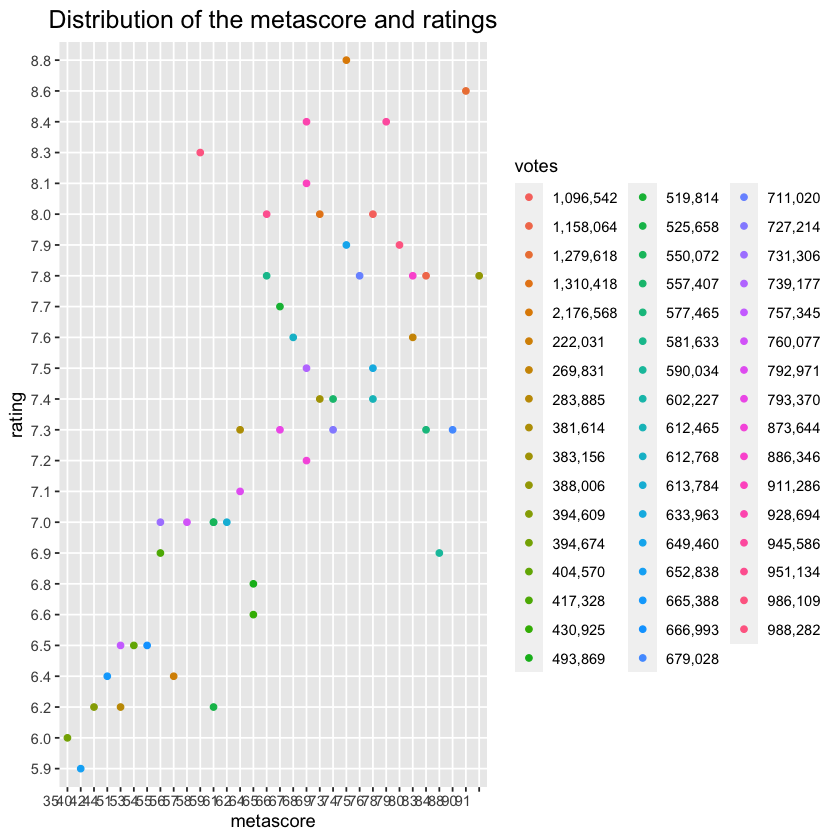

In [14]:
scifi_movie_distribution <- movie_data_final %>% ggplot(mapping = aes(x= metascore, y=rating, colour = votes )) + 
geom_point() + 
ggtitle("Distribution of the metascore and ratings") +
theme(plot.title = element_text(hjust=0.5, size = 15)) +
xlab("metascore") +
ylab("rating") 

scifi_movie_distribution

The plot implies that there is a positive relationship between metascore and rating. 
Sci-fi movies with higher metascore tend to have higher rating as well.

In terms of votes, orange and pink colours are more prevalent on the right side where as green and brown colours are more prevalent on the left side.
This indicates that sci-fi movies with higher metascore and higher rating tend to have higher number of votes as well.
In contrast, sci-fi movies with lower metascore and lower rating tend to have lower number of votes as well.

### StatNZ API

Retrieving the dataset from StatNZ API and convert it into a dataframe (or more than one).
The retrieved dataset has different variables so we'll only get those we need and make a plot out of it. 

In [15]:
library("tidyverse")
library("httr")
library("jsonlite")


Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




Loading necessary libraries.

In [16]:
get_odata_catalogue <-  function(service, endpoint, service_api_key) {
  
  catalogue_url <- URLencode(paste0(service, "/", endpoint))
  
  # Add the proxy authentication
  config_proxy <- use_proxy(
    url = curl::ie_get_proxy_for_url(service), 
    auth = "any", 
    username = ""
  )
  
  # Look at the available tables
  opendata_catalogue <- 
    GET(
      url = catalogue_url,
      config_proxy,
      add_headers(.headers = c('Cache-Control' = 'no-cache',
                               'Ocp-Apim-Subscription-Key' = service_api_key)),
      timeout(60)
    ) %>%
    content(as = "text") %>%
    fromJSON()
  
  opendata_catalogue <- as.data.frame(opendata_catalogue$dataset) %>%
    unnest_longer(distribution)
  
  
  structure(opendata_catalogue,
            comment = "Odata Catalogue")
  
}

Getting the open data catalogue of Stats NZ API.

In [17]:
Catalogue <- get_odata_catalogue(
  service="https://api.stats.govt.nz/opendata/v1",
  endpoint="data.json",
  service_api_key = " 177b5ce997aa403bbe5b0da554cc96f5 " 
)
Catalogue %>% typeof()
Catalogue %>% glimpse()

[1] "list"

Rows: 4
Columns: 16
$ title              <chr> "Employment Indicators", "Overseas Cargo", "Covid19…
$ description        <chr> "This employment indicator series is intended to pr…
$ identifier         <chr> "https://api.stats.govt.nz/odata/v1/EmploymentIndic…
$ license            <chr> "https://creativecommons.org/licenses/by/4.0/", "ht…
$ keyword            <list> <"Employment", "ResourceID MEI1.1: Filled jobs and…
$ issued             <chr> "2020-08-11T19:45:06Z", "2020-08-06T23:31:28Z", "20…
$ modified           <chr> "2020-12-10T22:39:15Z", "2020-12-10T22:51:17Z", "20…
$ publisher          <df[,2]> <data.frame[4 x 2]>
$ contactPoint       <df[,3]> <data.frame[4 x 3]>
$ landingPage        <chr> "https://www.stats.govt.nz", "https://www.stats.…
$ language           <list> "en", "en", "en", "en"
$ accrualPeriodicity <chr> "Monthly", "Monthly", "Weekly", "Monthly"
$ theme              <chr> "Employment", "Commerce, trade and industry", ""…
$ temporal           <chr> "1999-04-30/", "198

After putting the subscription key, Stats NZ API can now be accesed.

Its catalogue is of type list and glimpse() shows what's inside of the catalogue. 
We'll be focusing on the title however.

In [18]:
Catalogue$title %>% as.factor() %>% levels() 
Catalogue$identifier %>% as.factor() %>% levels()
Catalogue$description %>% as.factor() %>% levels()

[1] "Covid19 Indicators"      "Employment Indicators"  
[3] "International Migration" "Overseas Cargo"

[1] "https://api.stats.govt.nz/odata/v1/Covid-19Indicators"    
[2] "https://api.stats.govt.nz/odata/v1/EmploymentIndicators"  
[3] "https://api.stats.govt.nz/odata/v1/InternationalMigration"
[4] "https://api.stats.govt.nz/odata/v1/OverseasCargo"

[1] "International migration measures long-term arrivals and departures to and from New Zealand. This is an outcomes-based measure of migration estimated from the actual travel histories of people travelling in and out of New Zealand.\n  Before November 2018, Stats NZ classified travellers based on the intentions they stated on their passenger cards when they crossed the border. Calculating the actual travel duration (outcomes-based measure) is a more accurate way of measuring migration than relying on passenger card intentions. The outcomes-based measure is available back to January 2000.\n  With the removal of the departure cards in November 2018, Stats NZ made methodological changes to producing the official measures of migration, tourism, and the estimates of population.\n  For more informaiton refer to https://datainfoplus.stats.govt.nz/Item/nz.govt.stats/e2190954-9bd0-4ab9-81bd-4a5407de3f19"
[2] "Overseas cargo records all goods, value and gross weight, loaded or unloaded at sea or air ports."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
[3] "Stats NZ's COVID-19 data portal indicators gather key high-frequency indicators to help track the impact of COVID-19 on the economy.\n  \t\tExternally sourced data has not been verified by Stats NZ. Decision makers using the indicators should refer to the original indicator source to understand how the data was collected and issues such as sample error."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
[4] "This employment indicator series is intended to provide an early indication of changes in the labour market.\nThese indicators use a combination of data from two different Inland Revenue sources: the Employer Monthly Schedule (EMS) and payday filing."

Getting the title/indicator, its description and identifier.

In [19]:
get_odata <-  function(service, endpoint, entity, query_option, service_api_key) {
  
  config_proxy <- use_proxy(
    url = curl::ie_get_proxy_for_url(service),
    auth = "any",
    username = ""
  )
  
  odata_url <- URLencode(paste0(service, "/", endpoint, "/", entity, "?", query_option))
  top_query <- grepl("$top",query_option,fixed=TRUE)
  
  # continue getting results while there are additional pages
  
  while (!is.null(odata_url)) {
    
    result <- GET(odata_url,
                  config_proxy,
                  add_headers(.headers = c("Content-Type" = "application/json;charset=UTF-8",
                                           "Ocp-Apim-Subscription-Key" = service_api_key)),
                  timeout(60)
    )
    
    
    # catch errors
    
    if (http_type(result) != "application/json") {
      stop("API did not return json", call. = FALSE)
    }
    
    
    if (http_error(result)) {
      stop(
        sprintf(
          "The request failed - %s \n%s \n%s ",
          http_status(result)$message,
          fromJSON(content(result, "text"))$value,
          odata_url
        ),
        call. = FALSE
      )
    }
    
    
    # parse and concatenate result while retaining UTF-8 encoded characters
    
    parsed <- jsonlite::fromJSON(content(result, "text", encoding = "UTF-8"), flatten = TRUE)
    response  <- rbind(parsed$value, if(exists("response")) response)
    odata_url <- parsed$'@odata.nextLink'
    
    
    cat("\r", nrow(response), "obs retrieved")
    
    # break when top(n) obs are specified
    
    if (top_query) {
      break
    }
    
  }
  
  structure(response,
            comment = "Odata response")
  
}

The function above can be used whether to access the Resources or the Observations of catalogue. 
Resources stores all the datasets.
Observations are the individual dataset.

In [20]:
Resources <-  Filter(function(x)!all(is.na(x)),
                      get_odata(
                        service = "https://api.stats.govt.nz/opendata/v1",
                        endpoint = "Covid-19Indicators",
                        entity = "Resources",
                        query_option = "",
                        service_api_key = " 177b5ce997aa403bbe5b0da554cc96f5 "))  ### Please replace the alphanumeric string with your key

Resources %>% group_by(ResourceID, Title) %>% summarise() %>% print(n=nrow(.))

 179 obs retrieved

`summarise()` has grouped output by 'ResourceID'. You can override using the `.groups` argument.



# A tibble: 179 × 2
# Groups:   ResourceID [179]
    ResourceID Title                                                            
    <chr>      <chr>                                                            
  1 CPACT1     Broadband usage                                                  
  2 CPACT10    Rental bonds by region - lodged                                  
  3 CPACT11    Weekly mean rent by region                                       
  4 CPACT12    New Zealand Activity Index (NZAC)                                
  5 CPACT13    Card transaction total spend                                     
  6 CPACT14    Electricity grid demand                                          
  7 CPACT15    Electricity grid demand by region                                
  8 CPACT2     Milk production                                                  
  9 CPACT3     Retail sales index                                               
 10 CPACT4     Card transaction spend by industry           

Code above returns the datasets from the "Covid-19Indicators". 
We can be specific to what dataset to use by chaging the query_option.

In [21]:
deaths <-  Filter(function(x)!all(is.na(x)),
                         get_odata(
                           service = "https://api.stats.govt.nz/opendata/v1",
                           endpoint = "Covid-19Indicators",
                           entity = "Observations",
                           query_option = "$filter=(ResourceID eq 'CPWEE2')",
                           service_api_key = " 177b5ce997aa403bbe5b0da554cc96f5 ")) ### Please replace the alphanumeric string with your key

deaths

 5600 obs retrieved

,id,ResourceID,Period,Duration,Label1,Value,Unit,Measure,Multiplier
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,609e3839-465e-410b-95fd-2be7a1e81c8e,CPWEE2,2011-02-13,P7D,Female under 65,41,Number,Registered deaths,0
2,a1caeaf5-853a-4b55-a240-69f18f6707b4,CPWEE2,2011-02-20,P7D,Female under 65,47,Number,Registered deaths,0
3,003f1c78-f599-4dde-94b7-cf2028b4af49,CPWEE2,2011-03-20,P7D,Female under 65,38,Number,Registered deaths,0
4,342ec063-ce11-42cd-aefb-de816a4b1b40,CPWEE2,2011-03-27,P7D,Female under 65,47,Number,Registered deaths,0
5,8beee59a-a392-48ad-97a3-e37935181be0,CPWEE2,2011-04-10,P7D,Female under 65,43,Number,Registered deaths,0
6,99d53d85-d39f-4e38-8b47-888b744dfeb9,CPWEE2,2011-05-15,P7D,Female under 65,43,Number,Registered deaths,0
7,17705257-2003-4e74-be0d-705156de09cd,CPWEE2,2011-05-22,P7D,Female under 65,54,Number,Registered deaths,0
8,202e5adf-783b-404c-a2e8-1afa1a693f4a,CPWEE2,2011-05-29,P7D,Female under 65,49,Number,Registered deaths,0
9,00c9f764-b5fe-4c86-be74-8172e9354ad0,CPWEE2,2011-06-12,P7D,Female under 65,49,Number,Registered deaths,0


By specifying the resource ID in the query_option, the dataset (deaths) by age and sex can be returned. 
We can then make a graph for this one. 

### Plot

To understand the chosen variables and to see if there is any relationship between them. 

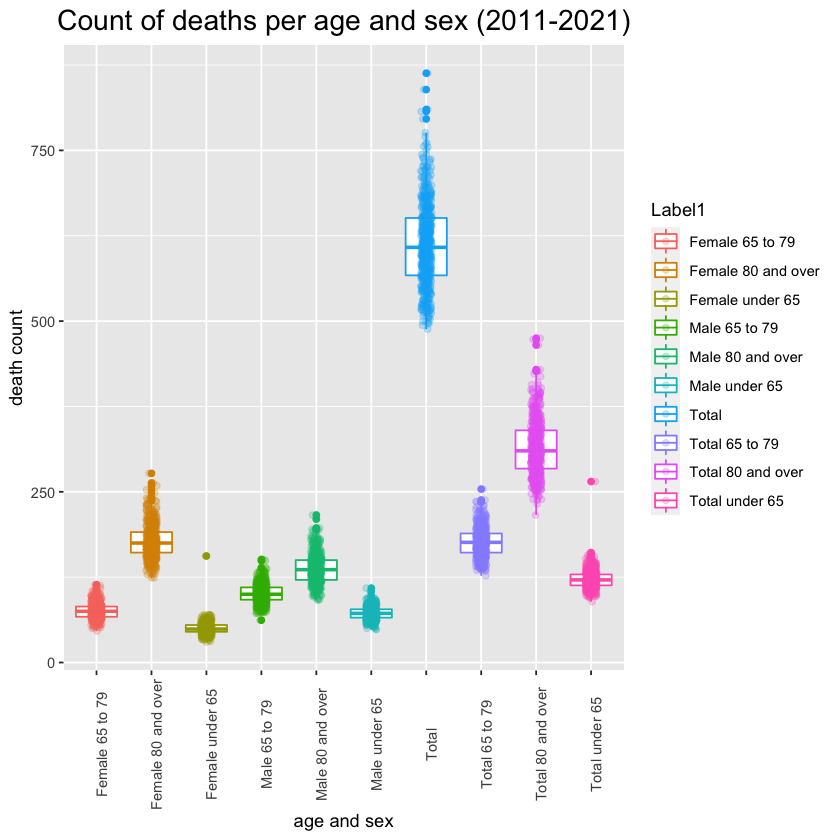

In [28]:
death_plot <- deaths %>% ggplot(aes(x = Label1, y = Value, colour=Label1, group = Label1)) + 
geom_boxplot() +
geom_jitter(position = position_jitter(width=0.1, height = 0), alpha = 1/4) + 
ggtitle("Count of deaths per age and sex (2011-2021)") +
theme(plot.title = element_text(hjust=0.5, size = 17)) +
xlab("age and sex") +
ylab("death count") +
theme(axis.text.x = element_text(angle = 90))

death_plot

The plot implies that the Total group has the highest median death count from 2011-2021, but that's an obvious case. 
However, I still included it for visual purposes.

In terms of age, the group "Total 80 and over" has the highest median death count and this could be due to old age. 
In terms of age and sex, "Female 80 and over" has the highest median death count. 
I would need to do reserach as to why females over 80 years old has a higher median death count than males over 80 years old. 
However, this would do for now.